# Removing Noise from Images Using Autoencoders

## Autoencoders for data compression

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd
import random

# Visualização de Dados
import matplotlib.pyplot as plt

# Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

## The MNIST handwritten digits dataset

In [2]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

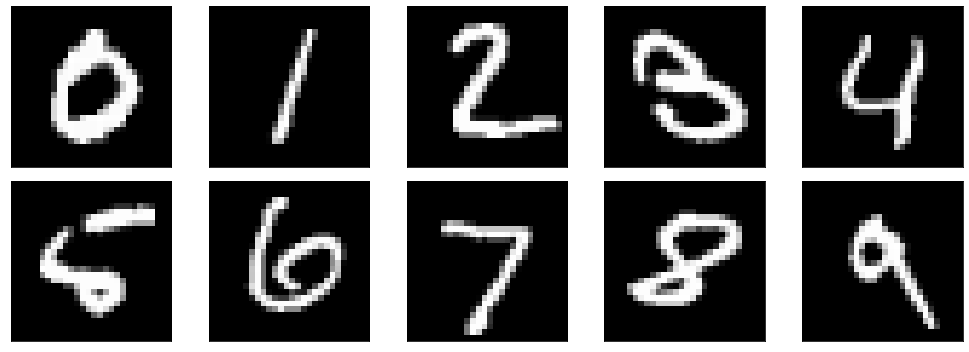

In [3]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(14, 5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

## Building a simple autoencoder

In [4]:
# Intanciando o modelo
model = Sequential()

# Hidden Layer
hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))

# Output Layer
model.add(Dense(units=784, activation='sigmoid'))

# Checando a estrutura do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [5]:
def basic_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

In [6]:
model = basic_autoencoder(hidden_layer_size=1)

In [7]:
# mudar as imagens de 28 x 28 para 784 x 1
X_train_reshaped = X_train.reshape((X_train.shape[0],
                                    X_train.shape[1] * X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0],
                                  X_test.shape[1] * X_test.shape[2]))

In [8]:
X_train_reshaped = X_train_reshaped / 255
X_test_reshaped = X_test_reshaped / 255

In [9]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0749
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0625
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0613


In [10]:
output = model.predict(X_test_reshaped)

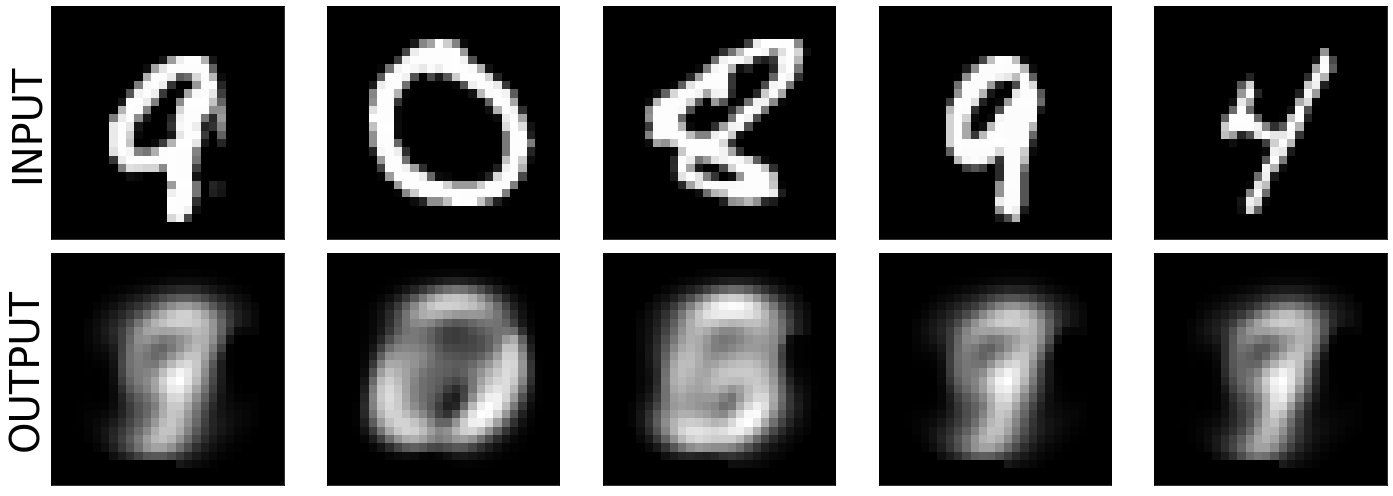

In [11]:
fig, ((ax1, ax2, ax3, ax4, ax5),
      (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))

# randomly select 5 images
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# plot original images (input) on top row
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0:
        ax.set_ylabel("INPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot output images from our autoencoder on the bottom row
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), 
              cmap='gray')
    if i == 0:
        ax.set_ylabel("OUTPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()